<a href="https://colab.research.google.com/github/hijinkim/TIL/blob/master/modelValidation_%EA%B9%80%ED%9D%AC%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
MV = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Model_Validation.csv')

MV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Inputs   1000 non-null   float64
 1   Outputs  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


## 7:3 Array Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(MV[['Inputs']], MV['Outputs'],
                                                    test_size=0.3, random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 1), (300, 1), (700,), (300,))

### Split 시각화

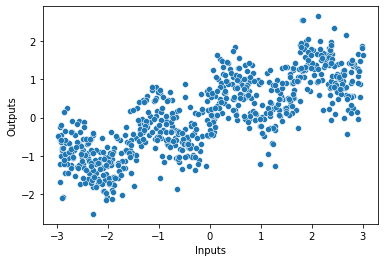

In [23]:
sns.scatterplot(X_train['Inputs'], y_train)
plt.show()

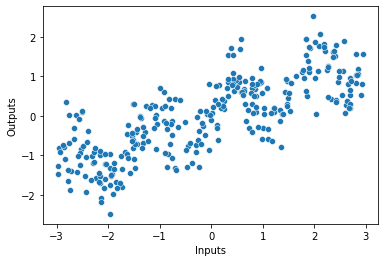

In [24]:
sns.scatterplot(X_test['Inputs'], y_test)
plt.show()

## 5차 모델

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
PX_5_TR = poly.fit_transform(X_train)

In [8]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

In [11]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_hat_5, y_test)

## 7차 모델

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7, include_bias=False)
PX_7_TR = poly.fit_transform(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

Model_7 = LinearRegression()
Model_7.fit(PX_7_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
PX_7_TE = poly.fit_transform(X_test)

y_hat_7 = Model_7.predict(PX_7_TE)

In [15]:
from sklearn.metrics import mean_squared_error

TE_Err_7 = mean_squared_error(y_hat_7, y_test)

## 9차 모델

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
PX_9_TR = poly.fit_transform(X_train)

In [17]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

In [19]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_hat_9, y_test)

## Test Error 비교

In [20]:
print('5차 모델 Test Error : ', TE_Err_5)
print('7차 모델 Test Error : ', TE_Err_7)
print('9차 모델 Test Error : ', TE_Err_9)

5차 모델 Test Error :  0.3602980472002336
7차 모델 Test Error :  0.35784993736519366
9차 모델 Test Error :  0.2893114750133329


## Modeling 시각화

In [53]:
def reg_plot(x):
  sns.regplot(x='Inputs',
              y='Outputs', 
              data=MV,
              order=x,
              line_kws={'color':'orange'},
              scatter_kws={'edgecolor':'white'})
  plt.ylim(-2,2)
  plt.show()

In [54]:
from ipywidgets import interact

order = [5, 7, 9]
interact(reg_plot, x=order)

interactive(children=(Dropdown(description='x', options=(5, 7, 9), value=5), Output()), _dom_classes=('widget-…

<function __main__.reg_plot>

## Residual 시각화

In [59]:
def residual_plot(x):
  sns.residplot(x='Inputs',
                y='Outputs',
                data=MV,
                order=x,
                scatter_kws={'edgecolor':'white'})
  plt.ylim(-2, 2)
  plt.show()

In [60]:
order = [5, 7, 9]
interact(residual_plot, x=order)

interactive(children=(Dropdown(description='x', options=(5, 7, 9), value=5), Output()), _dom_classes=('widget-…

<function __main__.residual_plot>